#Aula 3 do curso da Fast AI

Aluno: Adriano Ferreira Lopes

Matrícula: 201802671

In [1]:
#|default_exp app

## Gradio Pets

In [2]:
!pip install -q gradio
!pip install -q timm

In [3]:
#|export
from fastai.vision.all import *
import gradio as gr
import timm

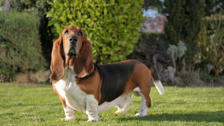

In [4]:
im = PILImage.create('basset.jpg')
im.thumbnail((224,224))
im

In [5]:
#|export
learn = load_learner('model.pkl')

In [6]:
learn.predict(im)

('basset_hound',
 tensor(14),
 tensor([1.4849e-10, 1.0554e-10, 1.7738e-11, 7.6697e-12, 2.6704e-10, 4.5115e-09,
         1.8189e-09, 4.0632e-10, 6.4674e-11, 2.4013e-10, 1.0587e-10, 1.5685e-10,
         1.6937e-10, 1.0518e-09, 1.0000e+00, 5.3998e-07, 7.7470e-11, 1.4588e-10,
         5.3222e-09, 6.3002e-10, 7.9711e-11, 1.3881e-10, 5.6655e-09, 2.8763e-10,
         1.2281e-09, 5.7073e-10, 9.3405e-12, 1.2080e-10, 3.5837e-09, 2.3241e-11,
         2.5388e-09, 9.3025e-11, 3.1909e-11, 6.0763e-12, 3.4777e-11, 6.3105e-11,
         5.4877e-11]))

In [7]:
#|export
categories = learn.dls.vocab

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [8]:
classify_image(im)

{'Abyssinian': 1.4848748619566976e-10,
 'Bengal': 1.0553848767136387e-10,
 'Birman': 1.7737852853194624e-11,
 'Bombay': 7.669749384209279e-12,
 'British_Shorthair': 2.670351717526387e-10,
 'Egyptian_Mau': 4.511503615134416e-09,
 'Maine_Coon': 1.8188669459462403e-09,
 'Persian': 4.0631883968522686e-10,
 'Ragdoll': 6.467430063716861e-11,
 'Russian_Blue': 2.401306375965362e-10,
 'Siamese': 1.0586732185347003e-10,
 'Sphynx': 1.5685497345430122e-10,
 'american_bulldog': 1.693653411960483e-10,
 'american_pit_bull_terrier': 1.0518224069500093e-09,
 'basset_hound': 0.9999994039535522,
 'beagle': 5.399815563578159e-07,
 'boxer': 7.747014141301634e-11,
 'chihuahua': 1.4588179275687452e-10,
 'english_cocker_spaniel': 5.322150276043658e-09,
 'english_setter': 6.300203136966331e-10,
 'german_shorthaired': 7.97114457773418e-11,
 'great_pyrenees': 1.3881004679028308e-10,
 'havanese': 5.6655400371141695e-09,
 'japanese_chin': 2.876268667684201e-10,
 'keeshond': 1.2280688688193209e-09,
 'leonberger': 5

In [9]:
#|export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['basset.jpg']

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


In [10]:
#|export
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


In [11]:
m = learn.model
m

Sequential(
  (0): TimmBody(
    (model): ConvNeXt(
      (stem): Sequential(
        (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
        (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
      )
      (stages): Sequential(
        (0): ConvNeXtStage(
          (downsample): Identity()
          (blocks): Sequential(
            (0): ConvNeXtBlock(
              (conv_dw): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
              (norm): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
              (mlp): Mlp(
                (fc1): Linear(in_features=96, out_features=384, bias=True)
                (act): GELU()
                (drop1): Dropout(p=0.0, inplace=False)
                (norm): Identity()
                (fc2): Linear(in_features=384, out_features=96, bias=True)
                (drop2): Dropout(p=0.0, inplace=False)
              )
              (shortcut): Identity()
              (drop_path): Identity()
          

In [12]:
l = m.get_submodule('0.model.stem.1')
list(l.parameters())

[Parameter containing:
 tensor([ 1.2539e+00,  1.9178e+00,  1.2214e+00,  1.0386e+00, -1.0227e-03,
          7.6540e-01,  8.8637e-01,  1.6324e+00,  7.0441e-01,  3.2899e+00,
          7.8565e-01, -7.5070e-04,  9.9967e-01, -2.2021e-03,  3.2970e+00,
         -3.7600e-04,  1.9849e+00,  1.0207e+00,  4.4536e+00,  2.5577e-01,
          2.7263e+00,  9.2530e-01,  1.2357e+00,  4.2233e-03,  1.7872e+00,
          5.4263e-01,  4.6271e+00,  1.1699e-02, -5.0456e-04,  3.4512e+00,
          1.3517e+00,  4.1270e+00,  2.6871e+00,  4.1210e+00,  3.4010e+00,
          8.4972e-01,  7.3748e-01,  3.9801e+00,  1.2850e+00,  6.4107e-01,
          2.6887e+00,  1.1177e+00,  1.1705e+00,  5.5391e-01,  2.3338e+00,
          1.5959e-03,  9.6772e-01,  4.6352e-04,  1.1995e+00,  1.7890e+00,
          4.0119e-01,  4.4955e-01,  9.7180e-01,  3.9900e+00,  6.5794e-01,
          6.8805e-01,  9.8620e-01,  2.7063e+00,  1.2171e+00,  7.6210e-01,
          3.3010e+00,  1.6189e+00,  9.5462e-01,  2.1207e+00,  6.2892e-01,
          4.034

In [13]:
l = m.get_submodule('0.model.stages.0.blocks.1.mlp.fc1')
list(l.parameters())

[Parameter containing:
 tensor([[ 2.2603e-02, -1.6516e-03,  4.0312e-02,  ...,  1.6111e-03,
          -4.5025e-02,  8.0868e-03],
         [-1.4396e-01,  1.6926e-02,  2.6035e-02,  ...,  1.2664e-02,
          -1.0452e-01,  5.6413e-02],
         [-6.5637e-02, -3.2888e-02,  5.8747e-03,  ..., -4.1624e-02,
           6.5952e-02, -4.0307e-02],
         ...,
         [-8.8449e-03,  6.9765e-02, -3.6590e-05,  ...,  4.1081e-03,
           4.1334e-02, -1.9191e-02],
         [ 1.9037e-03,  3.2197e-02,  2.9814e-02,  ..., -2.9625e-02,
          -3.0277e-02,  5.5540e-02],
         [ 1.2111e-01, -3.5367e-02, -4.3204e-03,  ..., -6.4187e-03,
           2.3689e-02, -1.1400e-02]], requires_grad=True),
 Parameter containing:
 tensor([-0.4048, -0.7419, -0.4232, -0.1650, -0.3025, -0.1898, -0.5535, -0.6272,
         -0.3008, -0.4252, -0.5994, -0.4107, -0.2172, -1.7936, -0.3170, -0.1164,
         -0.4482, -0.2846, -0.4342, -0.4947, -0.4066, -1.1405, -0.6753, -1.7237,
         -0.2955, -0.2655, -0.2187, -0.3913, 

In [14]:
!pip install -q nbdev
import nbdev

In [15]:
nbdev.export.nb_export('/content/drive/MyDrive/Colab Notebooks/app.ipynb', 'app')
print('Sucesso.')

Sucesso.


### Link do huggingface

https://huggingface.co/spaces/lopesdri/Aula3_FastAI